# Influence de la fréquence d'échantillonnage sur une acquisition

## Mise en évidence de la condition de Nyquist-Shannon

Cette première partie met en évidence la condition de Nyquist-Shannon sur l'exemple d'une sinusoïde : pour ne pas perdre d'information, il faut que la fréquence d'échantillonnage $f_e$ vérifie $f_e > 2 f_\mathrm{max}$.

In [1]:
# librairies pour l'interaction
%matplotlib notebook
from ipywidgets import interact, FloatSlider, Layout
import ipywidgets as widgets

In [2]:
# librairies scientifiques usuelles
import numpy as np
import scipy
import scipy.fftpack
# pour les graphiques
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


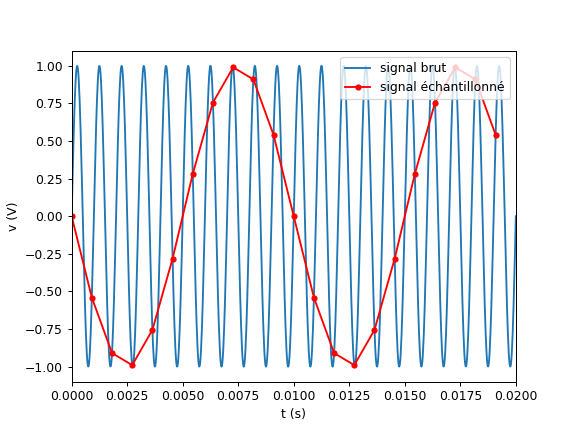

interactive(children=(FloatSlider(value=3000.0, description='fe (Hz)', layout=Layout(height='80px', width='80%…

<function __main__.update_fe(fe=3000)>

In [3]:
# Fréquence de la sinusoïde étudiée
f = 1000  # Hz


def s(t):
    return np.sin(2 * np.pi * f * t)


tmax = 20 / f  # La durée du signal affiché

# Signal "réel", échantillonné à très haute fréquence pour l'affichage
npoints = 1000
t_brut = np.linspace(0, tmax, npoints)
s_brut = s(t_brut)

# Signal échantillonné à la fréquence fe (prise initialement égale à 3 f)
fe = 3 * f
Te = 1 / fe
t_ech = np.arange(0, tmax, Te)  # les instants d'échantillonnage
s_ech = s(t_ech)  # valeurs échantillonnées

# Affichage des deux courbes
fig = plt.figure()
plt.plot(t_brut, s_brut, label="signal brut")
l_ech, = plt.plot(t_ech, s_ech, c='red', marker='o',
                  ms=4, label="signal échantillonné")
plt.xlabel("t (s)")
plt.ylabel("v (V)")
plt.xlim([0, tmax])
plt.legend(loc=1)


def update_fe(fe=3 * f):
    """Met à jour le graphique lorsqu'on change la fréquence d'échantillonnage"""
    Te = 1 / fe
    t_ech = np.arange(0, tmax, Te)
    l_ech.set_data(t_ech, s(t_ech))


interact(update_fe, fe=FloatSlider(min=f, max=5 * f, value=3 * f, step=100,
                                   description='fe (Hz)', layout=Layout(width='80%', height='80px')))

## Spectre du signal échantillonné

Le code ci-dessous permet de visualiser le spectre du signal échantilloné. On peut mettre en évidence le phénomène de repliement de spectre.

In [10]:
# Définition du signal à échantillonner.

# Fréquence du signal de base
f = 1000  # Hz
T = 1 / f


def s(t):
    """Retourne un signal au choix.
    Décommenter le bloc souhaitée"""
    # Une sinusoïde
    # return np.sin(2*np.pi*f*t)
    #
    # Une somme de sinusoïdes
    # return np.sin(2*np.pi*f*t)+.5*np.sin(2*np.pi*1.5*f*t)
    #
    # Les 7 premières harmoniques d'un signal en crénaux.
    #temp = 4/np.pi*np.sin(2*np.pi*f*t)
    # for i in range(6):
    #    temp+= 4/np.pi*np.sin(2*np.pi*(3+2*i)*f*t)/(3+2*i)
    # return temp

    # Les 7 premières harmoniques d'un signal triangulaire.
    temp = 8 / np.pi**2 * np.sin(2 * np.pi * f * t)
    for i in range(4):
        temp += 8 / np.pi**2 * (-1)**((3 + 2 * i - 1) / 2) *\
            np.sin(2 * np.pi * (3 + 2 * i) * f * t) / (3 + 2 * i)**2
    return temp

In [11]:
# fonctions auxilliaires.


def norm(array):
    """Normalise un tableau (divise toutes les valeurs par le maximum du tableau)"""
    return abs(array) / max(abs(array))


def echantillonne(f, tmax, Te, N):
    """Retourne la fonction échanitllonnée"""
    t_ech = np.arange(0, tmax, Te / N)
    s_ech = f(t_ech)
    for i in range(s_ech.size):
        if i % N != 0:
            s_ech[i] = 0
    return t_ech, s_ech

<IPython.core.display.Javascript object>


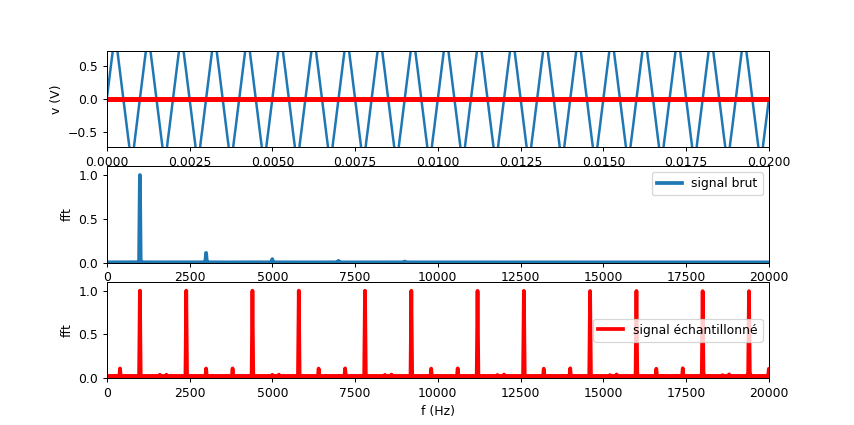

interactive(children=(FloatSlider(value=3000.0, description='fe (Hz)', layout=Layout(height='80px', width='80%…

<function __main__.update_fe(fe=3000)>

In [12]:
tmax = 40 * T
tmax_graphe = 20 * T

# Signal réel, échantillonné à très haute fréquence pour l'affichage
npoints = 10000
t_brut = np.linspace(0, tmax, npoints)
s_brut = s(t_brut)

# Signal échantillonné à la fréquence fe
fe = 3 * f
Te = 1 / fe

N = 30  # nombre de points par période d'échantillonnage
t_ech, s_ech = echantillonne(s, tmax, Te, N)
t_ech_g = np.arange(0, tmax, Te)
s_ech_g = s(t_ech_g)

# Calcul des transformées de Fourier
fft_brut = scipy.fft(s_brut)
fft_ech = scipy.fft(s_ech)

# Calcul des échelles de fréquence
freqs_brut = scipy.fftpack.fftfreq(s_brut.size, t_brut[1] - t_brut[0])
freqs_ech = scipy.fftpack.fftfreq(s_ech.size, t_ech[1] - t_ech[0])


# Affichage des  courbes
fig = plt.figure()

# Domaine temporel
ax1 = plt.subplot(311)
ax1.plot(t_brut, s_brut, lw=2)
l_ech, = ax1.plot(t_ech, s_ech, c='red', lw=4)
plt.xlabel("t (s)")
plt.ylabel("v (V)")
ym = max(s_ech)
plt.ylim([-1.1 * ym, 1.1 * ym])

plt.xlim([0, tmax_graphe])

# Domaine fréquentiel
ax2 = plt.subplot(312)
lfft_brut, = ax2.plot(freqs_brut, norm(fft_brut), label="signal brut", lw=3)
plt.xlabel("f (Hz)")
plt.ylabel("fft")
fmin = 0
fmax = 20000
plt.xlim([fmin, fmax])
plt.ylim([0, 1.1])
ax2.legend()

# Domaine fréquentiel
ax3 = plt.subplot(313)
lfft_ech, = ax3.plot(freqs_ech, norm(fft_ech),
                     label="signal échantillonné", lw=3, c='red')
plt.xlabel("f (Hz)")
plt.ylabel("fft")
plt.xlim([fmin, fmax])
plt.ylim([0, 1.1])
ax3.legend()


def update_fe(fe=3 * f):
    """Met à jour le graphique lorsqu'on change la fréquence d'échantillonnage"""
    Te = 1 / fe
    t_ech_g = np.arange(0, tmax, Te)
    s_ech_g = s(t_ech_g)
    # Formule à la louche pour avoir un spectre assez long
    N = int(40 * (Te / T + 2))
    t_ech, s_ech = echantillonne(s, tmax, Te, N)
    l_ech.set_data(t_ech, s_ech)

    fft_ech = scipy.fft(s_ech)
    freqs_ech = scipy.fftpack.fftfreq(s_ech.size, t_ech[1] - t_ech[0])
    lfft_ech.set_data(freqs_ech, norm(fft_ech))


interact(update_fe, fe=FloatSlider(min=f, max=10 * f, value=3 * f, step=100,
                                   description='fe (Hz)', layout=Layout(width='80%', height='80px')))
